# Pokemon Speed Regression Model

## Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

## 1. Load Dataset

In [2]:
df = pd.read_csv('Pokemon.csv')

In [3]:
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


## 2. Select Features

In [5]:
modified_df = df.iloc[:,5:11]
modified_df.head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,45,49,49,65,65,45
1,60,62,63,80,80,60
2,80,82,83,100,100,80
3,80,100,123,122,120,80
4,39,52,43,60,50,65


## 3. Train, Val, Test Split

In [6]:
shuffled_df = modified_df.sample(frac=1)
shuffled_df.head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
671,46,87,60,30,40,57
617,75,86,67,106,67,60
231,80,125,75,40,95,85
722,59,59,58,90,70,73
329,50,105,125,55,95,50


In [8]:
train_df = shuffled_df[:500]
val_df = shuffled_df[500:650]
test_df = shuffled_df[650:]

X_train, y_train = train_df.to_numpy()[:,:-1], train_df.to_numpy()[:,-1]
X_val, y_val = val_df.to_numpy()[:,:-1], val_df.to_numpy()[:,-1]
X_test, y_test = test_df.to_numpy()[:,:-1], test_df.to_numpy()[:,-1]

(X_train.shape, y_train.shape), (X_val.shape, y_val.shape), (X_test.shape, y_test.shape)

(((500, 5), (500,)), ((150, 5), (150,)), ((150, 5), (150,)))

## 4. Preprocess The Inputs

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
       [<Axes: title={'center': '2'}>, <Axes: title={'center': '3'}>],
       [<Axes: title={'center': '4'}>, <Axes: >]], dtype=object)

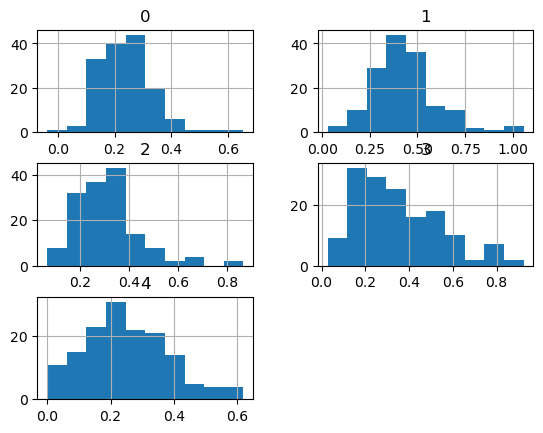

In [10]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled, X_val_scaled, X_test_scaled = scaler.transform(X_train), scaler.transform(X_val), scaler.transform(X_test)
pd.DataFrame(X_test_scaled).hist()

## 5. Finding The Best Model w/ Lowest Validation Error

In [11]:
averge_speed = y_train.mean()

mae = mean_absolute_error(y_val, [averge_speed]*len(y_val))
print(mae)

23.205200000000005


### Linear Regression

In [12]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_val)
lrmae = mean_absolute_error(y_val, y_pred_lr)
print(lrmae)

19.103978510964218


### Random Forest

In [13]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_val)
rfmae = mean_absolute_error(y_val, y_pred_rf)
print(rfmae)

23.546666666666667


### Shallow Nueral Network

In [16]:
model_1 = Sequential([layers.Input((5,)),
                     layers.Dense(1)])

model_1.compile(loss = 'mse', optimizer = Adam(learning_rate=0.01), metrics=['mean_absolute_error'])

model_1.fit(X_train,y_train, validation_data=(X_val,y_val), epochs=100)

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 10015.7578 - mean_absolute_error: 90.9157 - val_loss: 4078.5142 - val_mean_absolute_error: 53.1898
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2691.6353 - mean_absolute_error: 42.7946 - val_loss: 1714.8257 - val_mean_absolute_error: 32.7008
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1420.2682 - mean_absolute_error: 29.3497 - val_loss: 1727.9969 - val_mean_absolute_error: 32.4470
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1543.9709 - mean_absolute_error: 30.1894 - val_loss: 1622.8109 - val_mean_absolute_error: 31.4947
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1383.6432 - mean_absolute_error: 29.2498 - val_loss: 1532.0433 - val_mean_absolute_error: 30.5822
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1239.5497 - mean_absolute_error: 27.3764 - val_loss: 1474.7461 - val_mean_absolute_error: 29.9877
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - los

In [17]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20 (84.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 14 (60.00 B)

In [19]:
model_2 = Sequential([layers.Input((5,)),
                      layers.Dense(32),
                      layers.Dense(32),
                     layers.Dense(1)])

model_2.compile(loss = 'mse', optimizer = Adam(learning_rate=0.01), metrics=['mean_absolute_error'])

model_2.fit(X_train,y_train, validation_data=(X_val,y_val), epochs=100)

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2270.5427 - mean_absolute_error: 37.8848 - val_loss: 873.7156 - val_mean_absolute_error: 22.9536
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 803.3860 - mean_absolute_error: 22.0452 - val_loss: 730.8956 - val_mean_absolute_error: 21.4567
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 699.4891 - mean_absolute_error: 20.6085 - val_loss: 705.9128 - val_mean_absolute_error: 21.1445
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 648.6116 - mean_absolute_error: 19.8445 - val_loss: 715.7714 - val_mean_absolute_error: 21.1388
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 749.7293 - mean_absolute_error: 21.8071 - val_loss: 747.1596 - val_mean_absolute_error: 22.0316
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 759.2277 - mean_absolute_error: 21.5118 - val_loss: 703.5653 - val_mean_absolute_error: 21.0285
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 696.9068 

In [21]:
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 32)                  │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,845 (15.02 KB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,564 (10.02 KB)

### We Choosed Linear Regression

## 6. Evaluate The Chosen Model

In [23]:
y_pred_final = lr.predict(X_test)
Final_MAE = mean_absolute_error(y_test, y_pred_final)
print(Final_MAE)

17.17270623183392
